In [2]:
# ! pip install html_table_parser

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import requests
from bs4 import BeautifulSoup
from html_table_parser import parser_functions

In [5]:
import re
import math
import datetime

In [6]:
df_sp1 = pd.read_csv('data_files/S&P 500 내역 (1).csv')
df_sp2 = pd.read_csv('data_files/S&P 500 내역 (2).csv')[:-1]

In [7]:
df_sp2

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2022년 05월 05일,"4,152.38","4,255.50","4,256.39","4,105.51",-,-3.44%
1,2022년 05월 04일,"4,300.17","4,181.18","4,307.66","4,148.91",-,2.99%
2,2022년 05월 03일,"4,175.48","4,159.78","4,200.10","4,147.08",-,0.48%
3,2022년 05월 02일,"4,155.38","4,130.61","4,169.81","4,062.51",-,0.57%
4,2022년 04월 29일,"4,131.93","4,253.75","4,269.68","4,124.28",-,-3.63%
...,...,...,...,...,...,...,...
617,2019년 11월 21일,"3,103.54","3,108.49","3,110.11","3,094.55",-,-0.16%
618,2019년 11월 20일,"3,108.46","3,114.66","3,118.97","3,091.41",-,-0.38%
619,2019년 11월 19일,"3,120.18","3,127.45","3,127.64","3,113.47",-,-0.06%
620,2019년 11월 18일,"3,122.03","3,117.91","3,124.17","3,112.06",-,0.05%


In [8]:
df_sp = pd.concat([df_sp2, df_sp1])

In [9]:
# df_sp.to_csv('data_files/S&P500 데이터.csv')

In [10]:
df_sp = pd.read_csv('data_files/S&P500 데이터.csv', index_col='Unnamed: 0')

In [11]:
df_sp.head()

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2022년 05월 05일,"4,152.38","4,255.50","4,256.39","4,105.51",-,-3.44%
1,2022년 05월 04일,"4,300.17","4,181.18","4,307.66","4,148.91",-,2.99%
2,2022년 05월 03일,"4,175.48","4,159.78","4,200.10","4,147.08",-,0.48%
3,2022년 05월 02일,"4,155.38","4,130.61","4,169.81","4,062.51",-,0.57%
4,2022년 04월 29일,"4,131.93","4,253.75","4,269.68","4,124.28",-,-3.63%


In [12]:
df_mi10_1 = pd.read_csv('data_files/미국 10년물 국채 금리 채권 수익율 내역.csv')
df_mi10_2 = pd.read_csv('data_files/미국 10년물 국채 금리 채권 수익율 내역 (1).csv')

In [13]:
df_mi10 = pd.concat([df_mi10_2, df_mi10_1])

In [14]:
# df_mi10.to_csv('data_files/미국 10년 국채.csv')

In [15]:
df_mi10 = pd.read_csv('data_files/미국 10년 국채.csv', index_col='Unnamed: 0')
df_mi10.head()

,날짜,종가,오픈,고가,저가,변동 %
0,2022년 05월 06일,3.077,3.046,3.090,3.044,0.81%
1,2022년 05월 05일,3.052,2.964,3.102,2.933,3.60%
2,2022년 05월 04일,2.946,3.001,3.011,2.901,-0.97%
3,2022년 05월 03일,2.975,2.993,3.004,2.917,-0.06%
4,2022년 05월 02일,2.977,2.932,3.010,2.907,1.47%


In [16]:
df_gsci1 = pd.read_csv('data_files/S&P GSCI Commodity Total Return 내역.csv', index_col='날짜')
df_gsci2 = pd.read_csv('data_files/S&P GSCI Commodity Total Return 내역 (1).csv', index_col='날짜')

In [17]:
df_gsci = pd.concat([df_gsci2, df_gsci1])

In [18]:
# df_gsci.to_csv('data_files/S&P GSCI.csv')

In [19]:
df_gsci = pd.read_csv('data_files/S&P GSCI.csv')
df_gsci.head()

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2022년 05월 04일,"3,958.5029","3,837.0459","3,974.2603","3,837.0391",-,3.17%
1,2022년 05월 03일,"3,837.0591","3,903.1838","3,929.5400","3,828.2744",-,-1.69%
2,2022년 05월 02일,"3,903.0850","3,880.4614","3,912.5996","3,795.6445",-,0.52%
3,2022년 04월 29일,"3,882.9910","3,884.7021","3,947.7131","3,874.5657",-,-0.04%
4,2022년 04월 28일,"3,884.4270","3,844.6047","3,891.7925","3,809.6189",-,1.03%


In [20]:
res = requests.get('https://www.bok.or.kr/portal/singl/baseRate/list.do?dataSeCd=01&menuNo=200643')

In [21]:
soup = BeautifulSoup(res.text, 'html.parser')

In [22]:
data = soup.select('table')

In [23]:
table = parser_functions.make2d(data[0])

In [24]:
df_rate = pd.DataFrame(data=table[1:], columns=table[0])

In [25]:
df_rate

,변경일자,변경일자,기준금리
0,2022,04월 14일,1.50
1,2022,01월 14일,1.25
2,2021,11월 25일,1.00
3,2021,08월 26일,0.75
4,2020,05월 28일,0.50
5,2020,03월 17일,0.75
6,2019,10월 16일,1.25
7,2019,07월 18일,1.50
8,2018,11월 30일,1.75
9,2017,11월 30일,1.50


In [26]:
# df_rate.to_csv('data_files/연도별 금리.csv')

In [27]:
df_rate = pd.read_csv('data_files/연도별 금리.csv', index_col='Unnamed: 0')
df_rate.tail()

,변경일자,변경일자.1,기준금리
43,2001,08월 09일,4.50
44,2001,07월 05일,4.75
45,2001,02월 08일,5.00
46,2000,10월 05일,5.25
47,2000,02월 10일,5.00


In [28]:
df_sp = df_sp[['날짜', '종가']]

In [29]:
df_mi10 = df_mi10[['날짜', '종가']]

In [30]:
df_gsci = df_gsci[['날짜', '종가']]

In [31]:
df_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   변경일자    48 non-null     int64  
 1   변경일자.1  48 non-null     object 
 2   기준금리    48 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.5+ KB


In [32]:
df_rate['날짜'] = df_rate['변경일자'].astype('str') + df_rate['변경일자.1']

In [33]:
df_rate['날짜'] = df_rate['날짜'].apply(lambda x: re.sub(r'[^0-9]', '', x))

In [34]:
df_rate = df_rate[['날짜', '기준금리']]

In [35]:
df_rate['날짜'] = pd.to_datetime(df_rate['날짜'])

In [36]:
df_rate

,날짜,기준금리
0,2022-04-14,1.50
1,2022-01-14,1.25
2,2021-11-25,1.00
3,2021-08-26,0.75
4,2020-05-28,0.50
5,2020-03-17,0.75
6,2019-10-16,1.25
7,2019-07-18,1.50
8,2018-11-30,1.75
9,2017-11-30,1.50


In [37]:
df = pd.merge(df_sp, df_mi10, how='inner', on='날짜')

In [38]:
df = pd.merge(df, df_gsci, how='inner', on='날짜')

In [39]:
df['날짜'] = df['날짜'].apply(lambda x: re.sub(r'[^0-9]', '', x))

In [40]:
df['날짜'] = pd.to_datetime(df['날짜'])

In [41]:
df['날짜']

0      2022-05-04
1      2022-05-03
2      2022-05-02
3      2022-04-29
4      2022-04-28
          ...    
5611   2000-01-07
5612   2000-01-06
5613   2000-01-05
5614   2000-01-04
5615   2000-01-03
Name: 날짜, Length: 5616, dtype: datetime64[ns]

In [42]:
df_rate['날짜'].head()

0   2022-04-14
1   2022-01-14
2   2021-11-25
3   2021-08-26
4   2020-05-28
Name: 날짜, dtype: datetime64[ns]

In [43]:
date = df['날짜'][0]

In [44]:
from datetime import datetime

In [45]:
datetime.today().strftime("%Y-%m-%d")

'2022-05-13'

In [46]:
last_date = pd.to_datetime(datetime.today().strftime("%Y-%m-%d"))
for i in df_rate.T:
    current_date = df_rate.iloc[i]['날짜']
    if last_date > date >= current_date:
        print(current_date)
    last_date = df_rate.iloc[i]['날짜']

2022-04-14 00:00:00


In [47]:
df_rate.index[-1]

47

In [48]:
last_date = pd.to_datetime(datetime.today().strftime("%Y-%m-%d"))
rate_li = []
num = 0
for date in df['날짜']:
    rate_date = df_rate.iloc[num]['날짜']
    rate = df_rate.iloc[num]['기준금리']
    if date >= rate_date:
        print(date, rate)
        rate_li.append(rate)
    else:
        print(date)
        if num < df_rate.index[-1]:
            num += 1
        print(df_rate.iloc[num]['기준금리'])
        rate_li.append(df_rate.iloc[num]['기준금리'])
        

2022-05-04 00:00:00 1.5
2022-05-03 00:00:00 1.5
2022-05-02 00:00:00 1.5
2022-04-29 00:00:00 1.5
2022-04-28 00:00:00 1.5
2022-04-27 00:00:00 1.5
2022-04-26 00:00:00 1.5
2022-04-25 00:00:00 1.5
2022-04-22 00:00:00 1.5
2022-04-21 00:00:00 1.5
2022-04-20 00:00:00 1.5
2022-04-19 00:00:00 1.5
2022-04-18 00:00:00 1.5
2022-04-14 00:00:00 1.5
2022-04-13 00:00:00
1.25
2022-04-12 00:00:00 1.25
2022-04-11 00:00:00 1.25
2022-04-08 00:00:00 1.25
2022-04-07 00:00:00 1.25
2022-04-06 00:00:00 1.25
2022-04-05 00:00:00 1.25
2022-04-04 00:00:00 1.25
2022-04-01 00:00:00 1.25
2022-03-31 00:00:00 1.25
2022-03-30 00:00:00 1.25
2022-03-29 00:00:00 1.25
2022-03-28 00:00:00 1.25
2022-03-25 00:00:00 1.25
2022-03-24 00:00:00 1.25
2022-03-23 00:00:00 1.25
2022-03-22 00:00:00 1.25
2022-03-21 00:00:00 1.25
2022-03-18 00:00:00 1.25
2022-03-17 00:00:00 1.25
2022-03-16 00:00:00 1.25
2022-03-15 00:00:00 1.25
2022-03-14 00:00:00 1.25
2022-03-11 00:00:00 1.25
2022-03-10 00:00:00 1.25
2022-03-09 00:00:00 1.25
2022-03-08 00:

2019-12-23 00:00:00 1.25
2019-12-20 00:00:00 1.25
2019-12-19 00:00:00 1.25
2019-12-18 00:00:00 1.25
2019-12-17 00:00:00 1.25
2019-12-16 00:00:00 1.25
2019-12-13 00:00:00 1.25
2019-12-12 00:00:00 1.25
2019-12-11 00:00:00 1.25
2019-12-10 00:00:00 1.25
2019-12-09 00:00:00 1.25
2019-12-06 00:00:00 1.25
2019-12-05 00:00:00 1.25
2019-12-04 00:00:00 1.25
2019-12-03 00:00:00 1.25
2019-12-02 00:00:00 1.25
2019-11-29 00:00:00 1.25
2019-11-27 00:00:00 1.25
2019-11-26 00:00:00 1.25
2019-11-25 00:00:00 1.25
2019-11-22 00:00:00 1.25
2019-11-21 00:00:00 1.25
2019-11-20 00:00:00 1.25
2019-11-19 00:00:00 1.25
2019-11-18 00:00:00 1.25
2019-11-15 00:00:00 1.25
2019-11-14 00:00:00 1.25
2019-11-13 00:00:00 1.25
2019-11-12 00:00:00 1.25
2019-11-11 00:00:00 1.25
2019-11-08 00:00:00 1.25
2019-11-07 00:00:00 1.25
2019-11-06 00:00:00 1.25
2019-11-05 00:00:00 1.25
2019-11-04 00:00:00 1.25
2019-11-01 00:00:00 1.25
2019-10-31 00:00:00 1.25
2019-10-30 00:00:00 1.25
2019-10-29 00:00:00 1.25
2019-10-28 00:00:00 1.25


2017-02-23 00:00:00 1.25
2017-02-22 00:00:00 1.25
2017-02-21 00:00:00 1.25
2017-02-17 00:00:00 1.25
2017-02-16 00:00:00 1.25
2017-02-15 00:00:00 1.25
2017-02-14 00:00:00 1.25
2017-02-13 00:00:00 1.25
2017-02-10 00:00:00 1.25
2017-02-09 00:00:00 1.25
2017-02-08 00:00:00 1.25
2017-02-07 00:00:00 1.25
2017-02-06 00:00:00 1.25
2017-02-03 00:00:00 1.25
2017-02-02 00:00:00 1.25
2017-02-01 00:00:00 1.25
2017-01-31 00:00:00 1.25
2017-01-30 00:00:00 1.25
2017-01-27 00:00:00 1.25
2017-01-26 00:00:00 1.25
2017-01-25 00:00:00 1.25
2017-01-24 00:00:00 1.25
2017-01-23 00:00:00 1.25
2017-01-20 00:00:00 1.25
2017-01-19 00:00:00 1.25
2017-01-18 00:00:00 1.25
2017-01-17 00:00:00 1.25
2017-01-13 00:00:00 1.25
2017-01-12 00:00:00 1.25
2017-01-11 00:00:00 1.25
2017-01-10 00:00:00 1.25
2017-01-09 00:00:00 1.25
2017-01-06 00:00:00 1.25
2017-01-05 00:00:00 1.25
2017-01-04 00:00:00 1.25
2017-01-03 00:00:00 1.25
2016-12-30 00:00:00 1.25
2016-12-29 00:00:00 1.25
2016-12-28 00:00:00 1.25
2016-12-27 00:00:00 1.25


2014-08-14 00:00:00 2.25
2014-08-13 00:00:00
2.5
2014-08-12 00:00:00 2.5
2014-08-11 00:00:00 2.5
2014-08-08 00:00:00 2.5
2014-08-07 00:00:00 2.5
2014-08-06 00:00:00 2.5
2014-08-05 00:00:00 2.5
2014-08-04 00:00:00 2.5
2014-08-01 00:00:00 2.5
2014-07-31 00:00:00 2.5
2014-07-30 00:00:00 2.5
2014-07-29 00:00:00 2.5
2014-07-28 00:00:00 2.5
2014-07-25 00:00:00 2.5
2014-07-24 00:00:00 2.5
2014-07-23 00:00:00 2.5
2014-07-22 00:00:00 2.5
2014-07-21 00:00:00 2.5
2014-07-18 00:00:00 2.5
2014-07-17 00:00:00 2.5
2014-07-16 00:00:00 2.5
2014-07-15 00:00:00 2.5
2014-07-14 00:00:00 2.5
2014-07-11 00:00:00 2.5
2014-07-10 00:00:00 2.5
2014-07-09 00:00:00 2.5
2014-07-08 00:00:00 2.5
2014-07-07 00:00:00 2.5
2014-07-03 00:00:00 2.5
2014-07-02 00:00:00 2.5
2014-07-01 00:00:00 2.5
2014-06-30 00:00:00 2.5
2014-06-27 00:00:00 2.5
2014-06-26 00:00:00 2.5
2014-06-25 00:00:00 2.5
2014-06-24 00:00:00 2.5
2014-06-23 00:00:00 2.5
2014-06-20 00:00:00 2.5
2014-06-19 00:00:00 2.5
2014-06-18 00:00:00 2.5
2014-06-17 00:0

2011-12-23 00:00:00 3.25
2011-12-22 00:00:00 3.25
2011-12-21 00:00:00 3.25
2011-12-20 00:00:00 3.25
2011-12-19 00:00:00 3.25
2011-12-16 00:00:00 3.25
2011-12-15 00:00:00 3.25
2011-12-14 00:00:00 3.25
2011-12-13 00:00:00 3.25
2011-12-12 00:00:00 3.25
2011-12-09 00:00:00 3.25
2011-12-08 00:00:00 3.25
2011-12-07 00:00:00 3.25
2011-12-06 00:00:00 3.25
2011-12-05 00:00:00 3.25
2011-12-02 00:00:00 3.25
2011-12-01 00:00:00 3.25
2011-11-30 00:00:00 3.25
2011-11-29 00:00:00 3.25
2011-11-28 00:00:00 3.25
2011-11-25 00:00:00 3.25
2011-11-23 00:00:00 3.25
2011-11-22 00:00:00 3.25
2011-11-21 00:00:00 3.25
2011-11-18 00:00:00 3.25
2011-11-17 00:00:00 3.25
2011-11-16 00:00:00 3.25
2011-11-15 00:00:00 3.25
2011-11-14 00:00:00 3.25
2011-11-11 00:00:00 3.25
2011-11-10 00:00:00 3.25
2011-11-09 00:00:00 3.25
2011-11-08 00:00:00 3.25
2011-11-07 00:00:00 3.25
2011-11-04 00:00:00 3.25
2011-11-03 00:00:00 3.25
2011-11-02 00:00:00 3.25
2011-11-01 00:00:00 3.25
2011-10-31 00:00:00 3.25
2011-10-28 00:00:00 3.25


2009-03-25 00:00:00 2.0
2009-03-24 00:00:00 2.0
2009-03-23 00:00:00 2.0
2009-03-20 00:00:00 2.0
2009-03-19 00:00:00 2.0
2009-03-18 00:00:00 2.0
2009-03-17 00:00:00 2.0
2009-03-16 00:00:00 2.0
2009-03-13 00:00:00 2.0
2009-03-12 00:00:00 2.0
2009-03-11 00:00:00 2.0
2009-03-10 00:00:00 2.0
2009-03-09 00:00:00 2.0
2009-03-06 00:00:00 2.0
2009-03-05 00:00:00 2.0
2009-03-04 00:00:00 2.0
2009-03-03 00:00:00 2.0
2009-03-02 00:00:00 2.0
2009-02-27 00:00:00 2.0
2009-02-26 00:00:00 2.0
2009-02-25 00:00:00 2.0
2009-02-24 00:00:00 2.0
2009-02-23 00:00:00 2.0
2009-02-20 00:00:00 2.0
2009-02-19 00:00:00 2.0
2009-02-18 00:00:00 2.0
2009-02-17 00:00:00 2.0
2009-02-13 00:00:00 2.0
2009-02-12 00:00:00 2.0
2009-02-11 00:00:00
2.5
2009-02-10 00:00:00 2.5
2009-02-09 00:00:00 2.5
2009-02-06 00:00:00 2.5
2009-02-05 00:00:00 2.5
2009-02-04 00:00:00 2.5
2009-02-03 00:00:00 2.5
2009-02-02 00:00:00 2.5
2009-01-30 00:00:00 2.5
2009-01-29 00:00:00 2.5
2009-01-28 00:00:00 2.5
2009-01-27 00:00:00 2.5
2009-01-26 00:00

2006-09-01 00:00:00 4.5
2006-08-31 00:00:00 4.5
2006-08-30 00:00:00 4.5
2006-08-29 00:00:00 4.5
2006-08-28 00:00:00 4.5
2006-08-25 00:00:00 4.5
2006-08-24 00:00:00 4.5
2006-08-23 00:00:00 4.5
2006-08-22 00:00:00 4.5
2006-08-21 00:00:00 4.5
2006-08-18 00:00:00 4.5
2006-08-17 00:00:00 4.5
2006-08-16 00:00:00 4.5
2006-08-15 00:00:00 4.5
2006-08-14 00:00:00 4.5
2006-08-11 00:00:00 4.5
2006-08-10 00:00:00 4.5
2006-08-09 00:00:00
4.25
2006-08-08 00:00:00 4.25
2006-08-07 00:00:00 4.25
2006-08-04 00:00:00 4.25
2006-08-03 00:00:00 4.25
2006-08-02 00:00:00 4.25
2006-08-01 00:00:00 4.25
2006-07-31 00:00:00 4.25
2006-07-28 00:00:00 4.25
2006-07-27 00:00:00 4.25
2006-07-26 00:00:00 4.25
2006-07-25 00:00:00 4.25
2006-07-24 00:00:00 4.25
2006-07-21 00:00:00 4.25
2006-07-20 00:00:00 4.25
2006-07-19 00:00:00 4.25
2006-07-18 00:00:00 4.25
2006-07-17 00:00:00 4.25
2006-07-14 00:00:00 4.25
2006-07-13 00:00:00 4.25
2006-07-12 00:00:00 4.25
2006-07-11 00:00:00 4.25
2006-07-10 00:00:00 4.25
2006-07-07 00:00:

2003-10-27 00:00:00 3.75
2003-10-24 00:00:00 3.75
2003-10-23 00:00:00 3.75
2003-10-22 00:00:00 3.75
2003-10-21 00:00:00 3.75
2003-10-20 00:00:00 3.75
2003-10-17 00:00:00 3.75
2003-10-16 00:00:00 3.75
2003-10-15 00:00:00 3.75
2003-10-14 00:00:00 3.75
2003-10-13 00:00:00 3.75
2003-10-10 00:00:00 3.75
2003-10-09 00:00:00 3.75
2003-10-08 00:00:00 3.75
2003-10-07 00:00:00 3.75
2003-10-06 00:00:00 3.75
2003-10-03 00:00:00 3.75
2003-10-02 00:00:00 3.75
2003-10-01 00:00:00 3.75
2003-09-30 00:00:00 3.75
2003-09-29 00:00:00 3.75
2003-09-26 00:00:00 3.75
2003-09-25 00:00:00 3.75
2003-09-24 00:00:00 3.75
2003-09-23 00:00:00 3.75
2003-09-22 00:00:00 3.75
2003-09-19 00:00:00 3.75
2003-09-18 00:00:00 3.75
2003-09-17 00:00:00 3.75
2003-09-16 00:00:00 3.75
2003-09-15 00:00:00 3.75
2003-09-12 00:00:00 3.75
2003-09-11 00:00:00 3.75
2003-09-10 00:00:00 3.75
2003-09-09 00:00:00 3.75
2003-09-08 00:00:00 3.75
2003-09-05 00:00:00 3.75
2003-09-04 00:00:00 3.75
2003-09-03 00:00:00 3.75
2003-09-02 00:00:00 3.75


5.25
2001-02-06 00:00:00 5.25
2001-02-05 00:00:00 5.25
2001-02-02 00:00:00 5.25
2001-02-01 00:00:00 5.25
2001-01-31 00:00:00 5.25
2001-01-30 00:00:00 5.25
2001-01-29 00:00:00 5.25
2001-01-26 00:00:00 5.25
2001-01-25 00:00:00 5.25
2001-01-24 00:00:00 5.25
2001-01-23 00:00:00 5.25
2001-01-22 00:00:00 5.25
2001-01-19 00:00:00 5.25
2001-01-18 00:00:00 5.25
2001-01-17 00:00:00 5.25
2001-01-16 00:00:00 5.25
2001-01-12 00:00:00 5.25
2001-01-11 00:00:00 5.25
2001-01-10 00:00:00 5.25
2001-01-09 00:00:00 5.25
2001-01-08 00:00:00 5.25
2001-01-05 00:00:00 5.25
2001-01-04 00:00:00 5.25
2001-01-03 00:00:00 5.25
2001-01-02 00:00:00 5.25
2000-12-29 00:00:00 5.25
2000-12-28 00:00:00 5.25
2000-12-27 00:00:00 5.25
2000-12-26 00:00:00 5.25
2000-12-22 00:00:00 5.25
2000-12-21 00:00:00 5.25
2000-12-20 00:00:00 5.25
2000-12-19 00:00:00 5.25
2000-12-18 00:00:00 5.25
2000-12-15 00:00:00 5.25
2000-12-14 00:00:00 5.25
2000-12-13 00:00:00 5.25
2000-12-12 00:00:00 5.25
2000-12-11 00:00:00 5.25
2000-12-08 00:00:00 

In [49]:
len(rate_li)

5616

In [50]:
df['기준금리'] = rate_li

In [51]:
df[df.날짜 == '2021-11-26']

,날짜,종가_x,종가_y,종가,기준금리
109,2021-11-26,"4,594.62",1.482,"2,665.2280",1.0


In [52]:
df_rate

,날짜,기준금리
0,2022-04-14,1.50
1,2022-01-14,1.25
2,2021-11-25,1.00
3,2021-08-26,0.75
4,2020-05-28,0.50
5,2020-03-17,0.75
6,2019-10-16,1.25
7,2019-07-18,1.50
8,2018-11-30,1.75
9,2017-11-30,1.50


In [53]:
df

,날짜,종가_x,종가_y,종가,기준금리
0,2022-05-04,"4,300.17",2.946,"3,958.5029",1.5
1,2022-05-03,"4,175.48",2.975,"3,837.0591",1.5
2,2022-05-02,"4,155.38",2.977,"3,903.0850",1.5
3,2022-04-29,"4,131.93",2.938,"3,882.9910",1.5
4,2022-04-28,"4,287.50",2.832,"3,884.4270",1.5
...,...,...,...,...,...
5611,2000-01-07,"1,441.50",6.513,"2,689.9790",5.0
5612,2000-01-06,"1,403.50",6.540,"2,713.8350",5.0
5613,2000-01-05,"1,402.10",6.599,"2,714.8110",5.0
5614,2000-01-04,"1,399.40",6.499,"2,740.7410",5.0


In [54]:
df['연도'] = df['날짜'].apply(lambda x: str(x)[:4])

In [55]:
df.columns = ['날짜', 'S&P500', '미국채10년', 'GSCI', '기준금리', '연도']

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5616 entries, 0 to 5615
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      5616 non-null   datetime64[ns]
 1   S&P500  5616 non-null   object        
 2   미국채10년  5616 non-null   float64       
 3   GSCI    5616 non-null   object        
 4   기준금리    5616 non-null   float64       
 5   연도      5616 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 436.2+ KB


In [57]:
df['S&P500'] = df['S&P500'].apply(lambda x: float(x.replace(",", "")))

In [58]:
df['GSCI'] = df['GSCI'].apply(lambda x: float(x.replace(",", "")))

In [59]:
df.set_index('날짜', inplace=True)

In [60]:
# df.to_csv('data_files/2000이후 데이터.csv')

In [61]:
df = pd.read_csv('data_files/2000이후 데이터.csv')

In [62]:
df

,날짜,S&P500,미국채10년,GSCI,기준금리,연도
0,2022-05-04,4300.17,2.946,3958.5029,1.5,2022
1,2022-05-03,4175.48,2.975,3837.0591,1.5,2022
2,2022-05-02,4155.38,2.977,3903.0850,1.5,2022
3,2022-04-29,4131.93,2.938,3882.9910,1.5,2022
4,2022-04-28,4287.50,2.832,3884.4270,1.5,2022
...,...,...,...,...,...,...
5611,2000-01-07,1441.50,6.513,2689.9790,5.0,2000
5612,2000-01-06,1403.50,6.540,2713.8350,5.0,2000
5613,2000-01-05,1402.10,6.599,2714.8110,5.0,2000
5614,2000-01-04,1399.40,6.499,2740.7410,5.0,2000


In [63]:
df_cpi = pd.read_csv('data_files/CPI.csv', index_col='DATE')

In [64]:
df_cpi = df_cpi.loc['2000-01-01':]

In [65]:
df_cpi.index

Index(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01', '2000-05-01',
       '2000-06-01', '2000-07-01', '2000-08-01', '2000-09-01', '2000-10-01',
       ...
       '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01',
       '2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01'],
      dtype='object', name='DATE', length=267)

In [66]:
df_cpi.loc['2000-01-01']['CPIAUCSL']

169.3

In [67]:
year_li = pd.date_range(df_cpi.index[0], df_cpi.index[-1])

In [68]:
data_li = []
for year in year_li:
    if str(year)[:10] in df_cpi.index:
        data_li.append(df_cpi.loc[str(year)[:10]]['CPIAUCSL'])
    else:
        data_li.append(np.nan)

In [69]:
se_cpi_ext = pd.Series(index=year_li, data=data_li)

In [70]:
df_cpi_bo = pd.DataFrame(se_cpi_ext.interpolate())

In [71]:
df_cpi_bo.reset_index(inplace=True)

In [72]:
df_cpi_bo.columns = ['날짜', 'CPI']

In [73]:
df_cpi_bo['날짜'] = df_cpi_bo['날짜'].apply(lambda x : str(x)[:10])

In [74]:
df['날짜']

0       2022-05-04
1       2022-05-03
2       2022-05-02
3       2022-04-29
4       2022-04-28
           ...    
5611    2000-01-07
5612    2000-01-06
5613    2000-01-05
5614    2000-01-04
5615    2000-01-03
Name: 날짜, Length: 5616, dtype: object

In [75]:
df_cpi_bo['날짜']

0       2000-01-01
1       2000-01-02
2       2000-01-03
3       2000-01-04
4       2000-01-05
           ...    
8091    2022-02-25
8092    2022-02-26
8093    2022-02-27
8094    2022-02-28
8095    2022-03-01
Name: 날짜, Length: 8096, dtype: object

In [76]:
df = pd.merge(df, df_cpi_bo, how='inner', on='날짜')

In [77]:
df

,날짜,S&P500,미국채10년,GSCI,기준금리,연도,CPI
0,2022-03-01,4306.26,1.716,3558.3401,1.25,2022,287.708000
1,2022-02-28,4373.79,1.822,3369.3010,1.25,2022,287.582071
2,2022-02-25,4384.62,1.970,3266.9109,1.25,2022,287.204286
3,2022-02-24,4288.70,1.970,3341.8611,1.25,2022,287.078357
4,2022-02-23,4225.50,1.998,3298.0601,1.25,2022,286.952429
...,...,...,...,...,...,...,...
5566,2000-01-07,1441.50,6.513,2689.9790,5.00,2000,169.435484
5567,2000-01-06,1403.50,6.540,2713.8350,5.00,2000,169.412903
5568,2000-01-05,1402.10,6.599,2714.8110,5.00,2000,169.390323
5569,2000-01-04,1399.40,6.499,2740.7410,5.00,2000,169.367742


In [78]:
df_gdp = pd.read_csv('data_files/GDP.csv')

In [79]:
df_gdp['Year'] = df_gdp['Year'].apply(lambda x: x.replace(' projected', ''))

In [80]:
df_gdp[df_gdp['Year'] == '2000']['Real GDP of LDCs']

0    4.47332
Name: Real GDP of LDCs, dtype: float64

In [81]:
df_gdp[df_gdp['Year'] == '2000']['Real global GDP per capita']

0    3.072956
Name: Real global GDP per capita, dtype: float64

In [82]:
df['연도'] = df['연도'].astype('object')

In [83]:
df['연도'] = df['연도'].apply(lambda x: str(x))

In [84]:
df['연도'][0]

'2022'

In [85]:
df_gdp[df_gdp['Year'] == year]['Real GDP of LDCs'].values[0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [86]:
df_gdp

,Year,Real GDP of LDCs,Real global GDP per capita
0,2000,4.473320,3.072956
1,2001,5.655416,0.795037
2,2002,6.194148,0.993799
3,2003,5.625182,1.843708
4,2004,6.862873,3.190929
5,2005,7.950918,2.776139
6,2006,7.056823,3.239137
7,2007,8.248969,3.107691
8,2008,6.371761,0.777434
9,2009,5.114576,-2.472900


In [87]:
gdp_li = []
gdp_ldc_li = []
for year in df['연도']:
    gdp_li.append(df_gdp[df_gdp['Year'] == year-1]['Real GDP of LDCs'].values[0])
    gdp_ldc_li.append(df_gdp[df_gdp['Year'] == year-1]['Real global GDP per capita'].values[0])
    print(year)

TypeError: unsupported operand type(s) for -: 'str' and 'int'

In [ ]:
gdp_li

In [ ]:
df_gdp = pd.read_csv('data_files/GDP_gross.csv')

In [ ]:
df_gdp['DATE'] = df_gdp['DATE'].apply(lambda x: x[:4])

In [ ]:
df_gdp.set_index('DATE', inplace=True)

In [ ]:
(df_gdp.loc['2020']['NYGDPMKTPCDWLD'] - df_gdp.loc['2019']['NYGDPMKTPCDWLD']) / df_gdp.loc['2019']['NYGDPMKTPCDWLD']

In [ ]:
df_gdp.loc['2020']['NYGDPMKTPCDWLD']

In [ ]:
df_gdp

In [ ]:
gdp_li = []
for year in df['연도']:
    if 2020 >= int(year):
        gdp_li.append(df_gdp.loc[year]['NYGDPMKTPCDWLD'])

In [ ]:
gdp_li

In [ ]:
df_gdp = pd.read_csv('data_files/명목GDP 분기데이터.csv')
df_gdp

In [ ]:
df_gdp = df_gdp[['TIME', 'Value']]

In [ ]:
df_gdp[df_gdp.TIME == '1999-Q3'].Value.values[0]

In [ ]:
Q_li = []
for date in df['날짜']:
    year = date.split('-')[0]
    month = int(date.split('-')[1])
    if 3 >= month >= 1:
        Q = 'Q1'
    elif 6 >= month:
        Q = 'Q2'
    elif 9 >= month:
        Q = 'Q3'
    else:
        Q = 'Q4'
        
    Q_li.append(year + '-' + Q)

In [ ]:
df['quarter'] = Q_li

In [ ]:
Q_qdp_li = []
for Q in df['quarter']:
    Q_qdp_li.append(df_gdp[df_gdp.TIME == Q].Value.values[0])

In [ ]:
df['q_gdp'] = Q_qdp_li

In [ ]:
df

In [ ]:
df_sil = pd.read_csv('data_files/세계 실업율.csv')

In [ ]:
df_sil = df_sil[df_sil['LOCATION'] == 'OECD']

In [ ]:
df_sil.reset_index(drop=True, inplace=True)

In [ ]:
df_sil = df_sil[['TIME', 'Value']]

In [ ]:
df_sil[df_sil.TIME == '2001-01'].Value.values[0]

In [ ]:
df_sil

In [ ]:
sil_li = []
for date in df['날짜']:
    print(date[:-3])
    sil_li.append(df_sil[df_sil.TIME == date[:-3]].Value.values[0])

In [ ]:
url = 'https://www.thebalance.com/unemployment-rate-by-year-3305506'

In [ ]:
res = requests.get(url)

In [ ]:
soup = BeautifulSoup(res.text, 'html.parser')

In [ ]:
data = soup.select('table')

In [ ]:
len(data)

In [ ]:
table = parser_functions.make2d(data[0])

In [ ]:
df_unem = pd.DataFrame(data=table[1:], columns=table[0])

In [ ]:
df_unem.tail(15)

In [ ]:
df_unem[df_unem.Year == '2021']['Unemployment Rate (December)'].values[0][:-1]

In [ ]:
unem_li = []
gdp_li = []
infl_li = []
for year in df['연도']:
    
    year = str(int(year) - 1)
    unem_li.append(df_unem[df_unem.Year == year]['Unemployment Rate (December)'].values[0][:-1])
    gdp_li.append(df_unem[df_unem.Year == year]['Annual GDP Growth'].values[0][:-1])
    infl_li.append(df_unem[df_unem.Year == year]['Inflation (December, YOY)'].values[0][:-1])
   
        

In [ ]:
df['last_gdp'] = gdp_li
df['last_unem'] = unem_li
df['last_infl'] = infl_li

In [ ]:
df

In [ ]:
df_dollar = pd.read_excel('data_files/달러가격.xlsx')

In [ ]:
df_dollar

In [ ]:
df_dollar['Buy'] - df_dollar['Sell']

In [ ]:
df_dollar1 = pd.read_csv('data_files/미국 달러 지수 선물 내역 (5).csv')
df_dollar2 = pd.read_csv('data_files/미국 달러 지수 선물 내역 (6).csv')

In [ ]:
df_dollar = pd.concat([df_dollar2, df_dollar1])

In [ ]:
df_dollar['날짜']

In [ ]:
df_dollar['날짜'] = df_dollar['날짜'].apply(lambda x : re.sub(r'[^0-9]', '', x))

In [ ]:
df_dollar['날짜'] = pd.to_datetime(df_dollar['날짜'])

In [ ]:
df_dollar['날짜'] = df_dollar['날짜'].apply(lambda x : str(x)[:10])

In [ ]:
df_dollar = df_dollar[['날짜', '종가']]

In [ ]:
df_dollar.columns = ['날짜', '달러인덱스']

In [ ]:
df = pd.merge(df, df_dollar, how='inner', on='날짜')

In [ ]:
df

In [ ]:
# df.to_csv('data_files/딥러닝 데이터+.csv')

In [ ]:
df

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xticket'

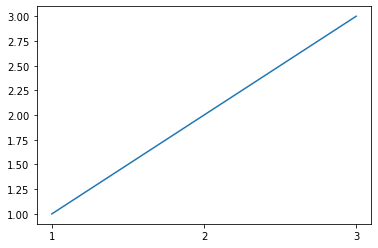

In [97]:
plt.plot([1,2,3], [1,2,3])
plt.xticks([1,2,3])
plt.set_xticket(['a', 'b', 'c'])